In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
data=pd.read_csv("Baseball.csv")

In [15]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [16]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [17]:
base=data.rename(columns={"W":"no._of_wins","R":"runs","AB":"at_bats","H":"hits","2B":"doubles","EB":"triples","HR":"home_runs","BB":"walks","SO":"strikeout","SB":"stolen_bases","RA":"runs_allowed","ER":"earned_runs","ERA":"earned_run_average","SHO":"shutouts","SV":"saves","E":"errors"})

In [18]:
base.columns

Index(['no._of_wins', 'runs', 'at_bats', 'hits', 'doubles', '3B', 'home_runs',
       'walks', 'strikeout', 'stolen_bases', 'runs_allowed', 'earned_runs',
       'earned_run_average', 'CG', 'shutouts', 'saves', 'errors'],
      dtype='object')

In [19]:
base.shape

(30, 17)

In [20]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
no._of_wins           30 non-null int64
runs                  30 non-null int64
at_bats               30 non-null int64
hits                  30 non-null int64
doubles               30 non-null int64
3B                    30 non-null int64
home_runs             30 non-null int64
walks                 30 non-null int64
strikeout             30 non-null int64
stolen_bases          30 non-null int64
runs_allowed          30 non-null int64
earned_runs           30 non-null int64
earned_run_average    30 non-null float64
CG                    30 non-null int64
shutouts              30 non-null int64
saves                 30 non-null int64
errors                30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [21]:
#To check duplicate value
base.duplicated().sum()

0

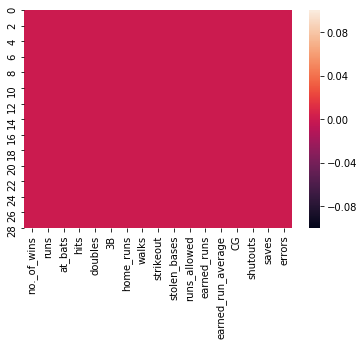

In [23]:
#To check missing value
sns.heatmap(base.isnull())

In [24]:
base.isnull().sum()

no._of_wins           0
runs                  0
at_bats               0
hits                  0
doubles               0
3B                    0
home_runs             0
walks                 0
strikeout             0
stolen_bases          0
runs_allowed          0
earned_runs           0
earned_run_average    0
CG                    0
shutouts              0
saves                 0
errors                0
dtype: int64

Summary Statistic

In [25]:
base.describe()

,no._of_wins,runs,at_bats,hits,doubles,3B,home_runs,walks,strikeout,stolen_bases,runs_allowed,earned_runs,earned_run_average,CG,shutouts,saves,errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Check Correlation

In [26]:
base.corr()

,no._of_wins,runs,at_bats,hits,doubles,3B,home_runs,walks,strikeout,stolen_bases,runs_allowed,earned_runs,earned_run_average,CG,shutouts,saves,errors
no._of_wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
at_bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
home_runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
strikeout,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
stolen_bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


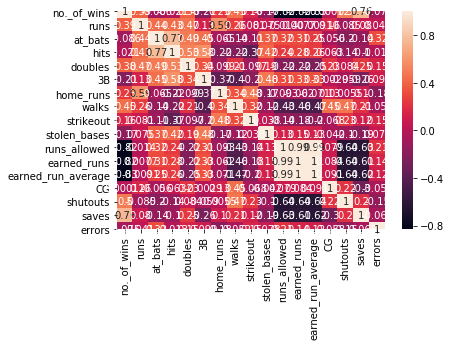

In [35]:
sns.heatmap(base.corr(),annot=True)

Plotting Outliers

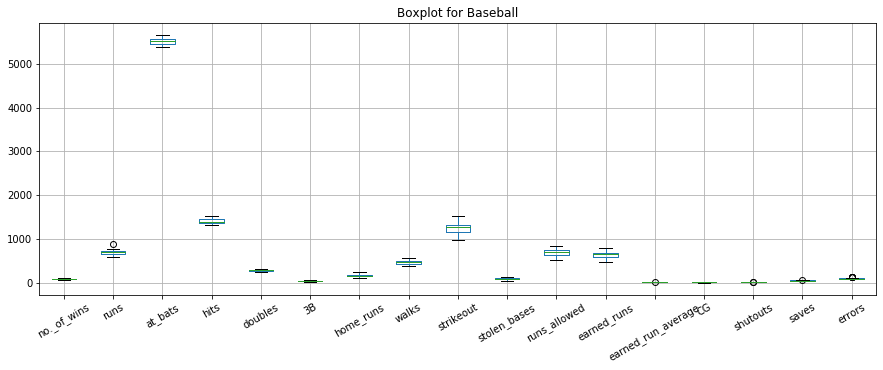

In [28]:
base.plot(kind='box',grid=True,title="Boxplot for Baseball",legend=True,rot=30,figsize=(15,5))

In [29]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(base))
print(base.shape)
base=base.loc[(z_score < 3).all(axis=1)]
print(base.shape)

(30, 17)
(29, 17)


In [30]:
#Check for Skewness
base.skew()

no._of_wins           0.119013
runs                 -0.215364
at_bats               0.169573
hits                  0.783772
doubles              -0.335304
3B                    0.090124
home_runs             0.450862
walks                 0.151193
strikeout            -0.233815
stolen_bases          0.494966
runs_allowed          0.018155
earned_runs           0.018461
earned_run_average    0.016693
CG                    0.854980
shutouts              0.526943
saves                 0.627480
errors                0.840271
dtype: float64

In [31]:
for col in base.columns:
    if base.skew().loc[col] > 0.55:
        base[col]=np.log1p(base[col])

In [32]:
base.skew()

no._of_wins           0.119013
runs                 -0.215364
at_bats               0.169573
hits                  0.738455
doubles              -0.335304
3B                    0.090124
home_runs             0.450862
walks                 0.151193
strikeout            -0.233815
stolen_bases          0.494966
runs_allowed          0.018155
earned_runs           0.018461
earned_run_average    0.016693
CG                   -0.275681
shutouts              0.526943
saves                 0.109983
errors                0.586101
dtype: float64

In [33]:
base.corr()

,no._of_wins,runs,at_bats,hits,doubles,3B,home_runs,walks,strikeout,stolen_bases,runs_allowed,earned_runs,earned_run_average,CG,shutouts,saves,errors
no._of_wins,1.000000,0.390451,-0.085780,-0.020785,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.000122,0.497526,0.756909,-0.075008
runs,0.390451,1.000000,0.438022,0.432236,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.164021,-0.085108,0.080162,0.041193
at_bats,-0.085780,0.438022,1.000000,0.770154,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.056349,-0.198872,-0.142034,0.321833
hits,-0.020785,0.432236,0.770154,1.000000,0.527354,0.579735,-0.219201,-0.221773,-0.373301,0.420199,0.243639,0.279956,0.255886,0.062589,-0.138087,-0.099684,-0.012775
doubles,0.384886,0.469293,0.490752,0.527354,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.226900,0.084060,0.246600,0.146978
3B,-0.206737,0.134204,0.445604,0.579735,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.002910,-0.058896,-0.259901,0.098532
home_runs,0.245697,0.586894,-0.064653,-0.219201,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.126024,0.005546,0.100228,-0.182374
walks,0.447513,0.258450,-0.137850,-0.221773,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.448140,0.473922,0.205211,-0.052376
strikeout,0.156469,0.081158,-0.111243,-0.373301,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.068395,0.231230,0.119732,0.152594
stolen_bases,-0.169503,0.075323,0.373674,0.420199,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.042099,-0.104602,-0.193739,0.078008


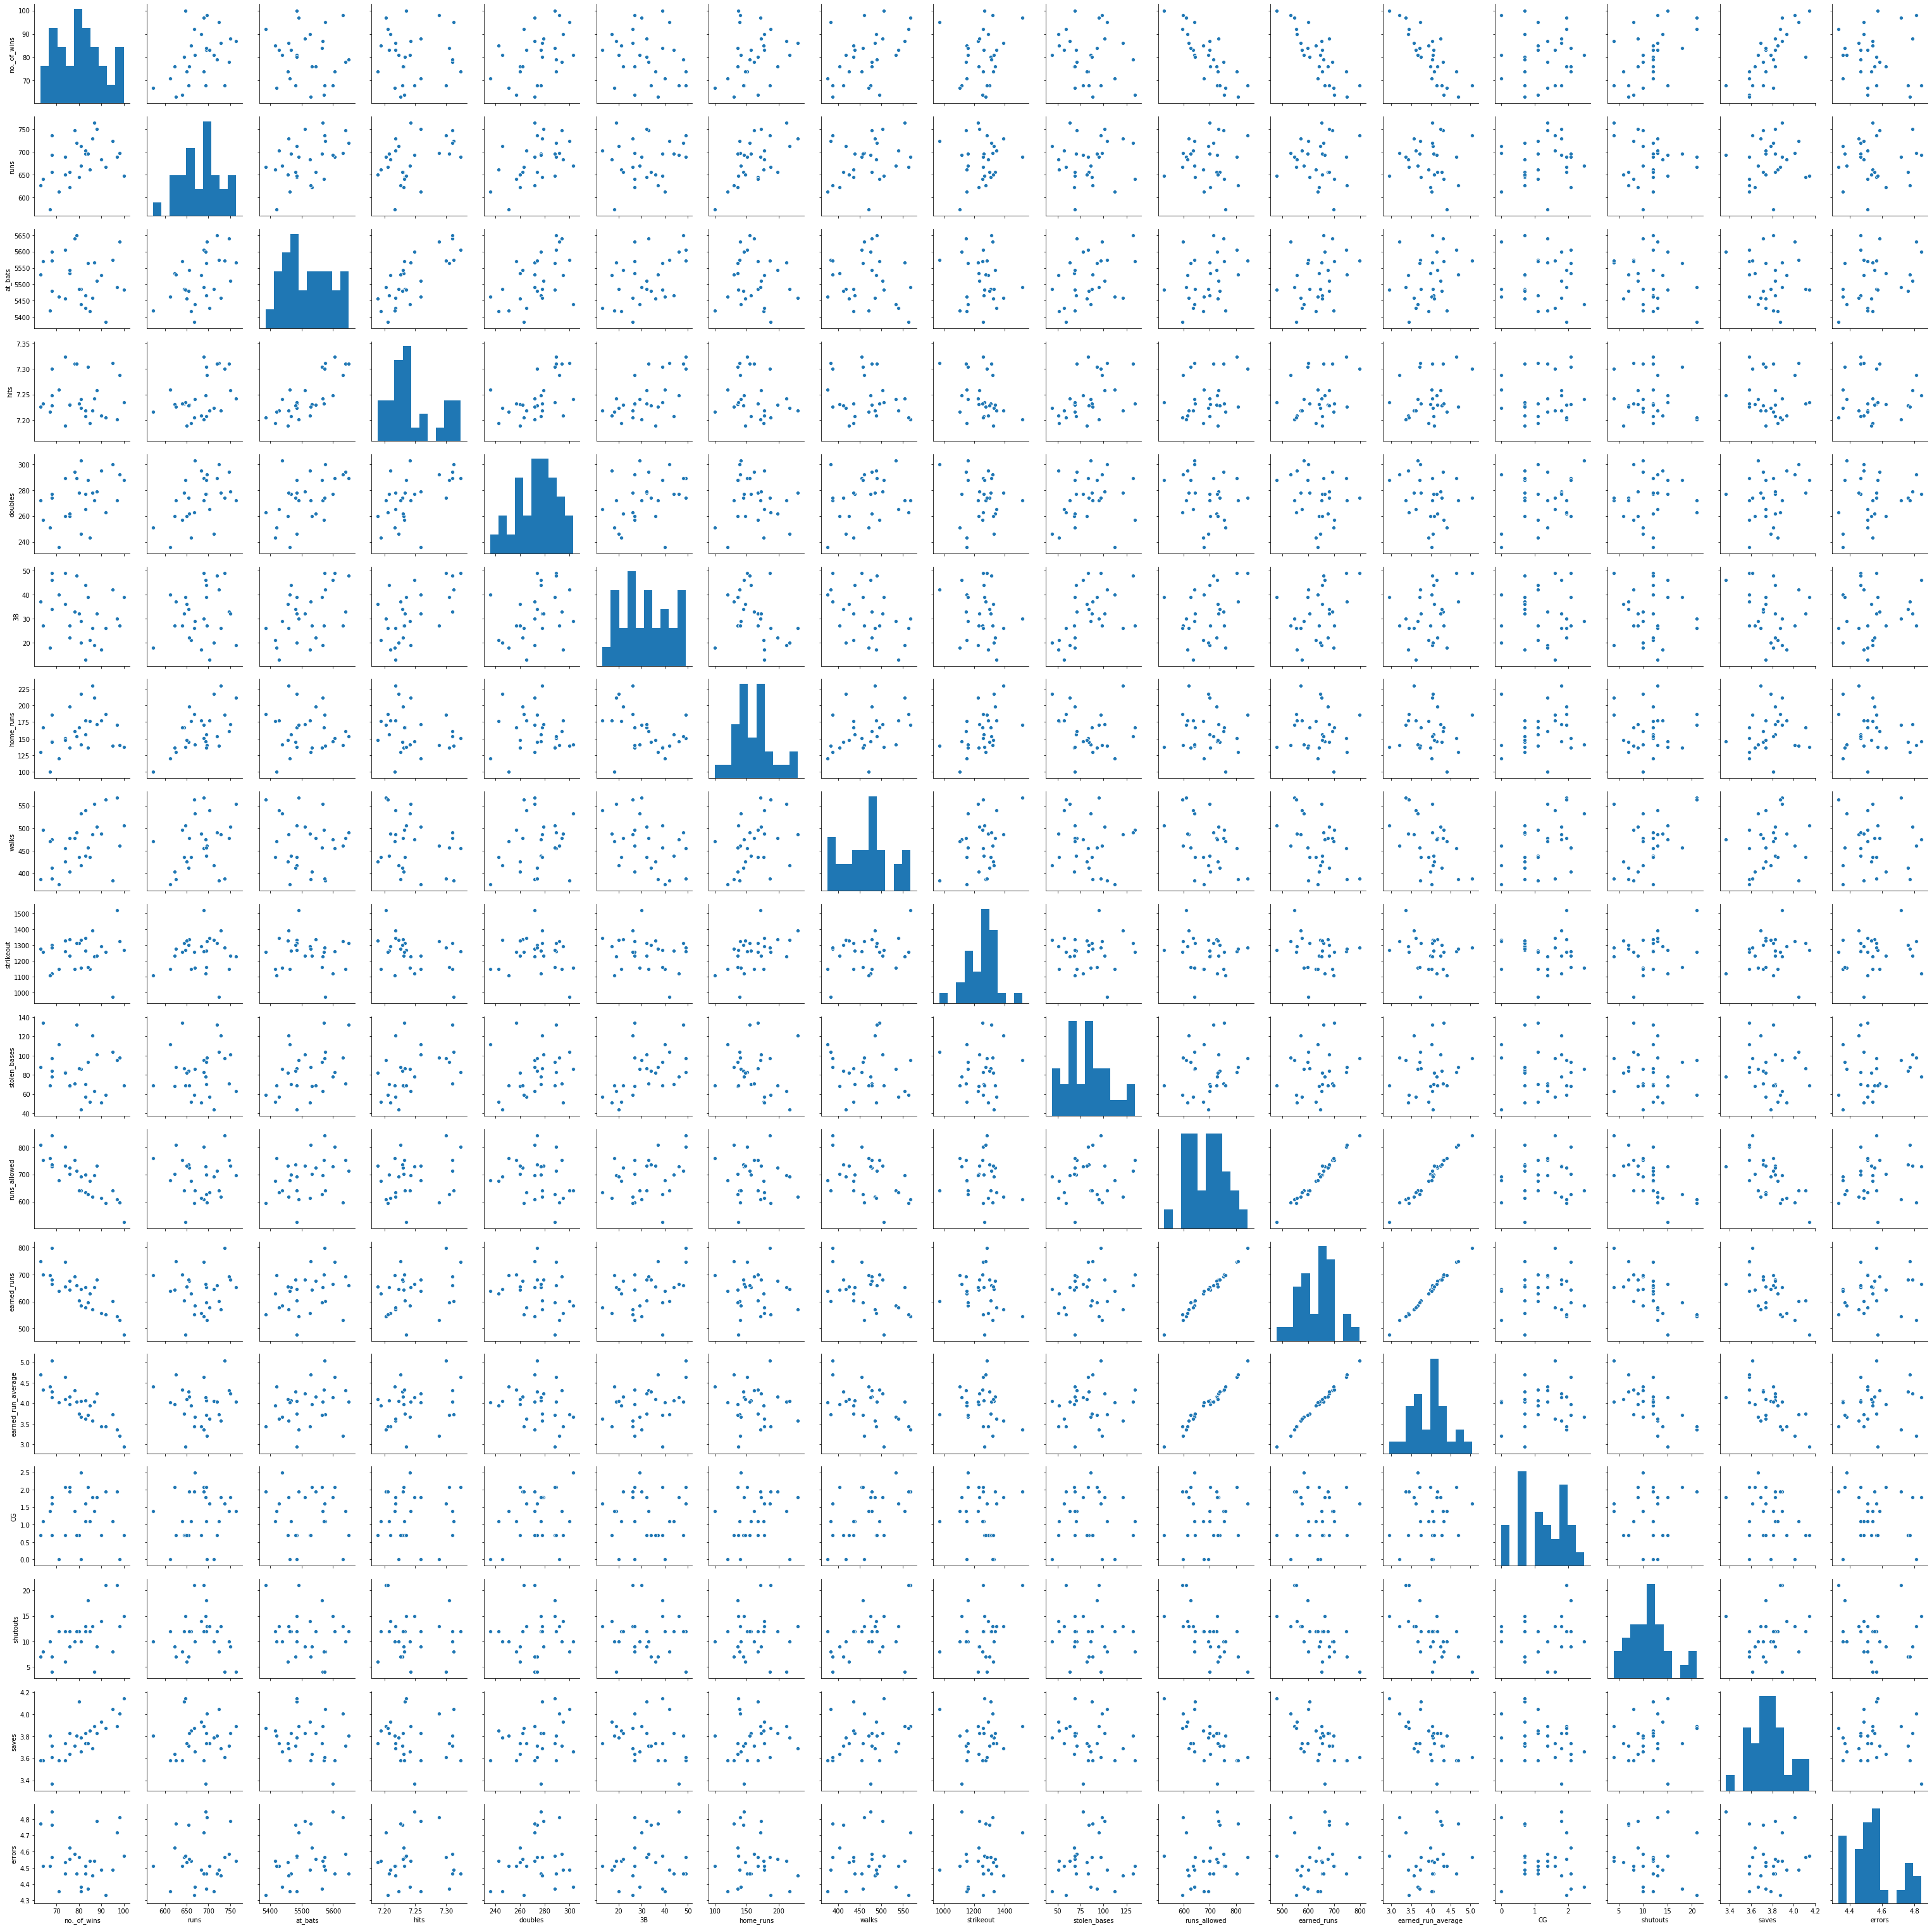

In [36]:
sns.pairplot(base)

Features and Target Value

In [37]:
x=base.drop(['no._of_wins'],axis=1)
y=base['no._of_wins']

In [38]:
x.head(2)

,runs,at_bats,hits,doubles,3B,home_runs,walks,strikeout,stolen_bases,runs_allowed,earned_runs,earned_run_average,CG,shutouts,saves,errors
0,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051,4.488636
1,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641,4.465908


In [39]:
y.head(2)

0    95
1    83
Name: no._of_wins, dtype: int64

Standardisation

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [41]:
x=sc.fit_transform(x)
x

array([[ 0.95939835,  0.83008422,  1.72372599,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.24041455, -0.81326172,  1.55481209,
        -0.43573324],
       [ 0.33114717, -0.70283074, -0.94984589,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.24041455,  0.15929869,  0.29622875,
        -0.59810993],
       [-0.27466646, -1.10025314, -0.08870013,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  1.81571095, -0.32698152, -0.67278738,
        -1.19738162],
       [-1.32923093,  0.23395062, -0.34774692, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.21433279, -0.57012162, -0.82526317,
         0.53829069],
       [ 0.17408438,  1.25589393,  2

Spilt Train and Test

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [85]:
def mod(model,x,y):
    max_r=0
    for i in range(30,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        if r2score > max_r:
            max_r=r2score
            random_state=i
    print('the random state at ', mod,'\nis: ',random_state, 
          '\nand it produces \n r2 score of ',r2score,
          '\n mean abs error value of ', MAE,
          '\n mean squared error value of',MSE,
          '\n & root mean sq error ', RMSE)
    return random_state

LinearRegression

In [86]:
lr=LinearRegression()
mod(lr,x,y)

the random state at  <function mod at 0x0000001E5E3A7D38> 
is:  62 
and it produces 
 r2 score of  0.6733329832846848 
 mean abs error value of  4.31873536407823 
 mean squared error value of 33.884645363482456 
 & root mean sq error  5.821051912110255


62

In [87]:
#cross validation
lr_scr=cross_val_score(lr,x,y,cv=5,scoring='r2')
print('the r2 score at liner regression model is=', lr_scr.mean())

the r2 score at liner regression model is= 0.04078645834637891


Decision Tree Regressor

In [88]:
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','friedman_mse', 'mae'],'max_depth':[3,4,5]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=5)
dtr_grid.fit(x,y)
dtr_grid.best_params_

{'criterion': 'mse', 'max_depth': 3}

In [89]:
dtr=DecisionTreeRegressor(criterion='mse',max_depth=3)
mod(dtr,x,y)

the random state at  <function mod at 0x0000001E5E3A7D38> 
is:  30 
and it produces 
 r2 score of  0.4011939577068626 
 mean abs error value of  7.161375661375662 
 mean squared error value of 62.113189720332606 
 & root mean sq error  7.8811921509586735


30

In [90]:
#Cross Validation
dtr_scr=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print('the r2 score at DTR model is=', dtr_scr.mean())

the r2 score at DTR model is= -2.3949899014713756


KNeighbors Regressor

In [91]:
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute']}
k_grid=GridSearchCV(knr,k_para,cv=5)
k_grid.fit(x,y)
k_grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 5}

In [92]:
knr=KNeighborsRegressor(algorithm='ball_tree',n_neighbors=5)
mod(knr,x,y)

the random state at  <function mod at 0x0000001E5E3A7D38> 
is:  101 
and it produces 
 r2 score of  0.5386669840514164 
 mean abs error value of  5.844444444444444 
 mean squared error value of 47.853333333333325 
 & root mean sq error  6.917610377387073


101

In [93]:
#Cross Validation
knr_scr=cross_val_score(knr,x,y,cv=5,scoring='r2')
print('the r2 score at KNR model is=', knr_scr.mean())

the r2 score at KNR model is= 0.027111560669320613


SVR

In [94]:
svr=SVR()
svr_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svr_grid=GridSearchCV(svr,svr_para,cv=5)
svr_grid.fit(x,y)
svr_grid.best_params_

{'gamma': 0.01, 'kernel': 'linear'}

In [95]:
svr=SVR(kernel='linear',gamma=0.01)
mod(svr,x,y)

the random state at  <function mod at 0x0000001E5E3A7D38> 
is:  50 
and it produces 
 r2 score of  0.789946179933889 
 mean abs error value of  3.4686503996340243 
 mean squared error value of 21.78854563204277 
 & root mean sq error  4.667820222763808


50

In [96]:
#Cross Validation
svr_scr=cross_val_score(svr,x,y,cv=5,scoring='r2')
print('the r2 score at SVR model is=', svr_scr.mean())

the r2 score at SVR model is= 0.394491641941272


AdaBoost Regressor

In [97]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
mod(ada,x,y)

the random state at  <function mod at 0x0000001E5E3A7D38> 
is:  33 
and it produces 
 r2 score of  0.6069660091125731 
 mean abs error value of  5.737914862914863 
 mean squared error value of 40.76878507945877 
 & root mean sq error  6.385043858851619


33

Final Model

In [98]:
svr=SVR(kernel='linear',gamma=0.01)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
r2score=r2_score(y_test,pred)
MAE= mean_absolute_error(y_test,pred)
MSE= mean_squared_error(y_test,pred)
RMSE=np.sqrt(MSE)
print('At SVR the r2 score=',r2score)

At SVR the r2 score= 0.9086684656624027


In [99]:
pred

array([ 65.4669685 ,  77.98568039,  75.41493966,  82.00608549,
        74.40431431,  65.22911929,  87.34804087,  91.33801967,
       102.76717096])

In [100]:
import joblib
joblib.dump(svr,"SVR for Baseball Dataset.pkl")

['SVR for Baseball Dataset.pkl']